In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from utils import *

In [2]:
# Read file csv
data = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_bureau_balance.csv")
data.head(30)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [3]:
# Size of the dataframe
data.shape

(27299925, 3)

In [4]:
# Columns of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [5]:
#total number of duplicate rows in bureau balance's column
data.duplicated().sum()

0

In [6]:
# The number of unique elements in each column
data.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

# Understanding of variables

SK_BUREAU_ID - Recoded ID of Credit Bureau credit (unique coding for each application) - use this to join to CREDIT_BUREAU table

MONTHS_BALANCE - Month of balance relative to application date (-1 means the freshest balance date)

STATUS - Status of Credit Bureau loan during the month (active, closed, DPD0-30,… [C means closed, X means status unknown, 0 means no DPD, 1 means maximal did during month between 1-30, 2 means DPD 31-60,… 5 means DPD 120+ or sold or written off ] )


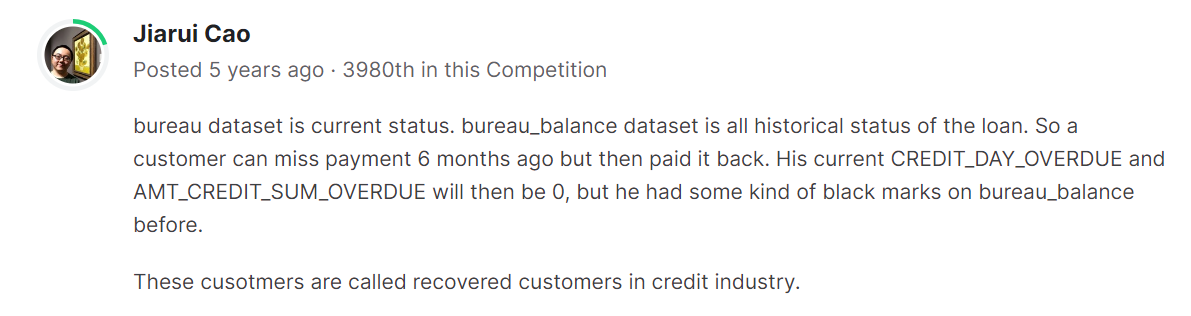

In [7]:
# Count the number of each type of STATUS
data['STATUS'].value_counts()

STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64

In [8]:
# Total missing data and the percentage of missing values in each column
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(data)

,Total,Percent
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [10]:
# Wanted palette details
new_palette = ['#EB0524', 'grey', '#B0041D', 'black']
color_codes_wanted = ['C1', 'C2', 'C3', 'C4']
c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# EDA

### MERGE with TARGET columns in application_train.csv to get more insights

In [11]:
# Read bureau.csv
bureau = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_bureau.csv")
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


In [12]:
# Import SK_ID_CURR and TARGET column from application_train
target = pd.read_csv("D:/Data Preparation final project group 2/Data/dseb63_application_train.csv", usecols = ['TARGET', 'SK_ID_CURR'])
target.head()

,TARGET,SK_ID_CURR
0,0,278621
1,0,139008
2,0,138348
3,0,64140
4,0,219374


In [13]:
# Merge SK_ID_BUREAU with SK_ID_CURR in bureau.csv
data_merged_prev = pd.merge(bureau[['SK_ID_CURR','SK_ID_BUREAU']], data, how= 'left', on=['SK_ID_BUREAU'])
data_merged_prev.head()

,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,254629,5714462,NaN,NaN
1,254629,5714463,NaN,NaN
2,254629,5714464,NaN,NaN
3,254629,5714465,NaN,NaN
4,254629,5714466,NaN,NaN


In [14]:
# Merge SK_ID_CURR with target
data_merged = pd.merge(target, data_merged_prev, how='left', on=['SK_ID_CURR'])
data_merged.head()

,TARGET,SK_ID_CURR,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,0,278621,5885877.0,NaN,NaN
1,0,278621,5885878.0,NaN,NaN
2,0,278621,5885879.0,NaN,NaN
3,0,278621,5885880.0,NaN,NaN
4,0,139008,NaN,NaN,NaN


### MONTHS_BALANCE

In [15]:
# Check when the oldest data recorded for each customer
grouped = data.groupby('SK_ID_BUREAU').MONTHS_BALANCE.min().reset_index()
grouped

,SK_ID_BUREAU,MONTHS_BALANCE
0,5001709,-96
1,5001710,-82
2,5001711,-3
3,5001712,-18
4,5001713,-21
...,...,...
817390,6842884,-47
817391,6842885,-23
817392,6842886,-32
817393,6842887,-36


In [16]:
grouped['MONTHS_BALANCE'].describe()

count    817395.000000
mean        -39.432847
std          28.132570
min         -96.000000
25%         -58.000000
50%         -34.000000
75%         -16.000000
max           0.000000
Name: MONTHS_BALANCE, dtype: float64

On average, this file contains data about the balance of credit bureaus for 39 months. The number of bureau credit that have data is 817395

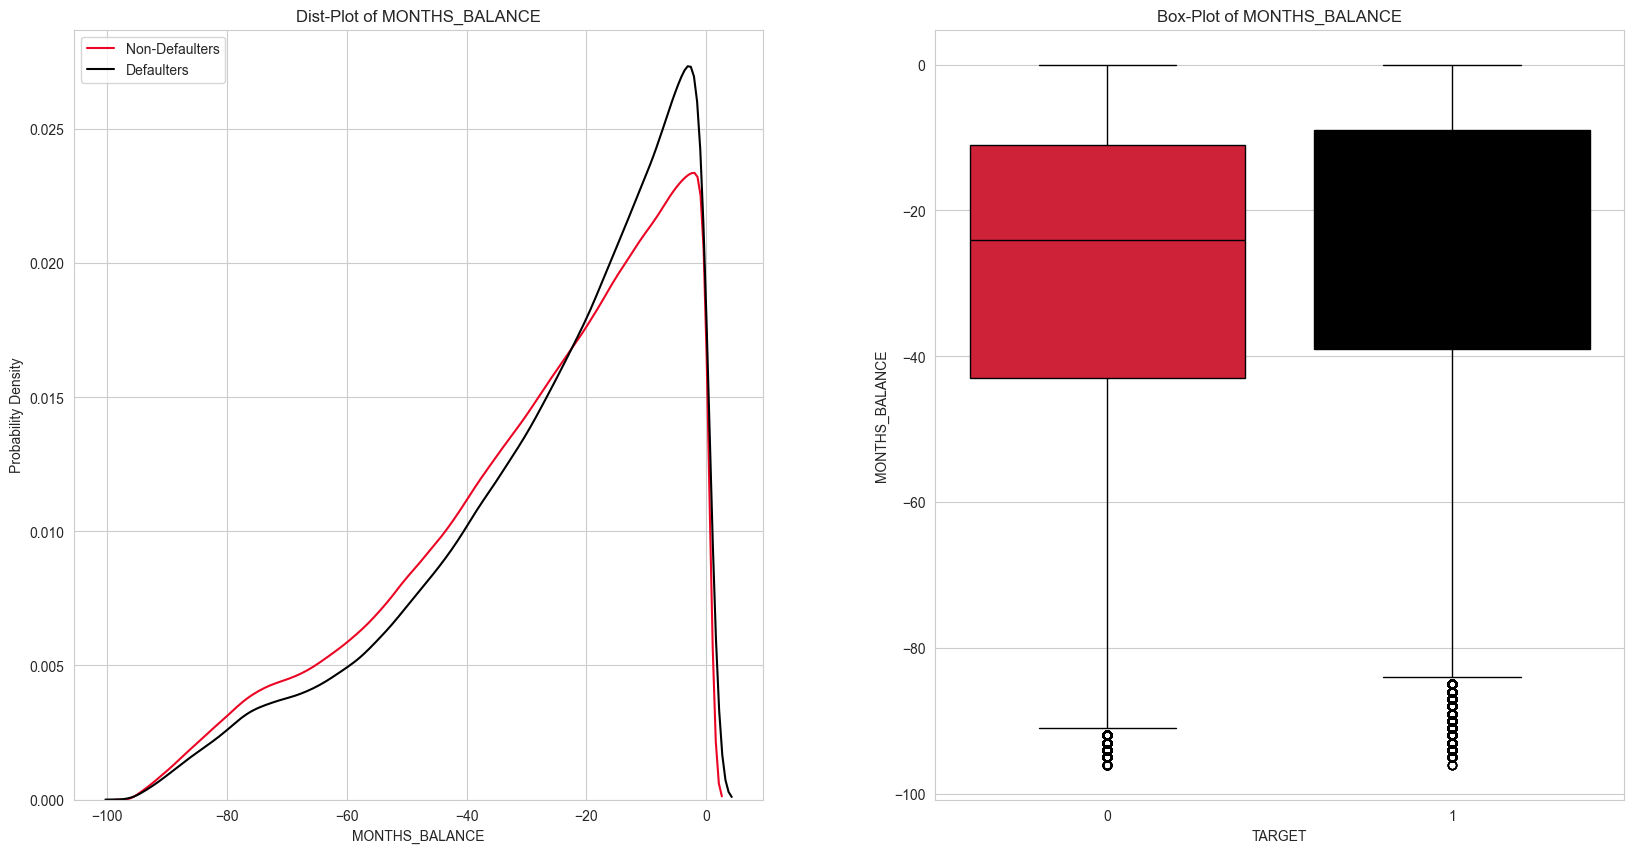

In [17]:
# MONTHS_BALANCE analysis
plot_continuous_variables(data_merged, 'MONTHS_BALANCE', plots=['distplot','box'], figsize=(20,10))

Both defaulters and non-defaulters have MONTHS_BALANCE distributed mainly over a period of < 20 days. With MONTHS_BALANCE <-20, non-defaulter has greater density than defaulter. Mean is also larger than defaulter (length of credit history is large -> more likely to be non-defaulter).

## STATUS

Total Number of unique categories of STATUS = 9


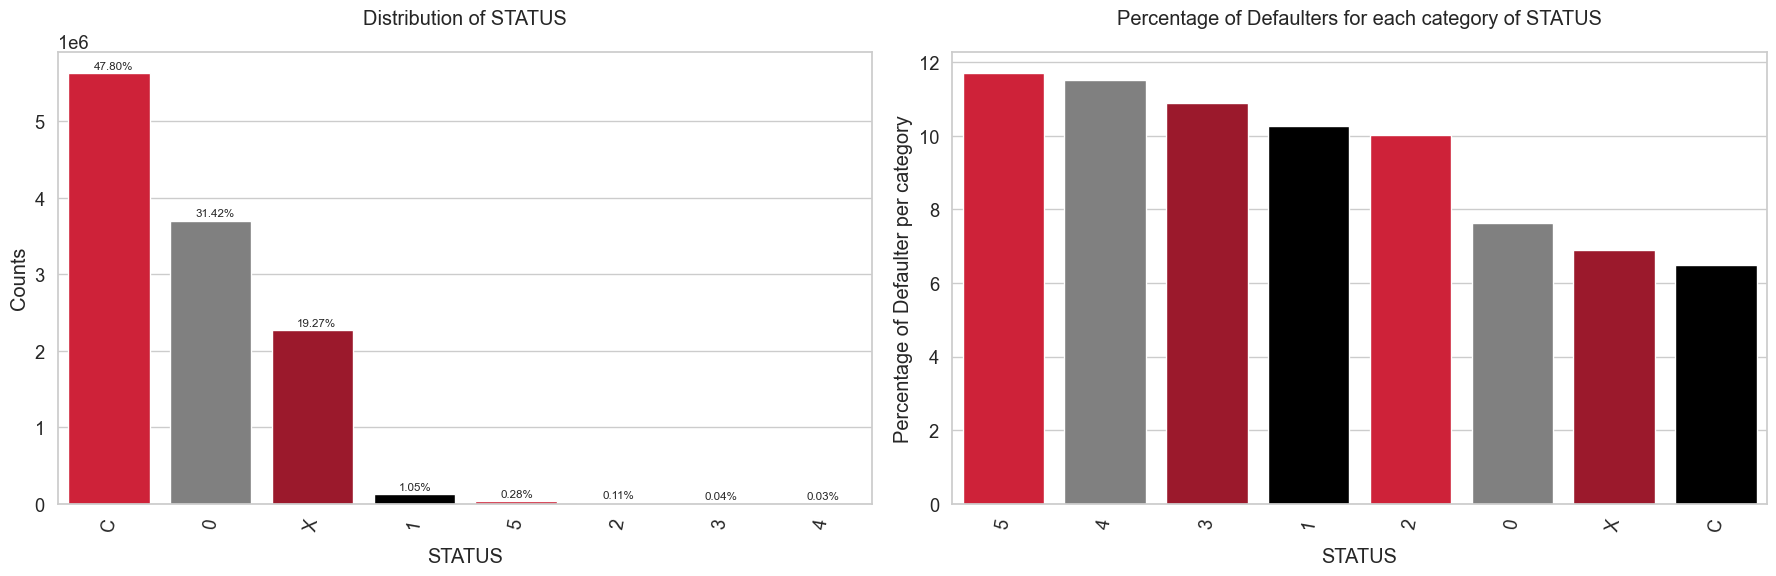

In [18]:
# STATUS analysis
plot_categorical_variables_bar(data_merged,'STATUS',rotation=80, horizontal_adjust=0.25, color=new_palette)

Defaulter more usually repay their loan overdue than Non-Defaulter

### Number of STATUS for each customer

In [19]:
# Calculate the number of unique STATUS values for each combination of SK_ID_CURR and TARGET
grp = data_merged[['SK_ID_CURR', 'STATUS', 'TARGET']].groupby(['SK_ID_CURR','TARGET'])['STATUS'].nunique().reset_index()
grp

,SK_ID_CURR,TARGET,STATUS
0,0,0,0
1,1,1,2
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
246004,307505,0,2
246005,307506,0,0
246006,307507,0,0
246007,307509,0,3


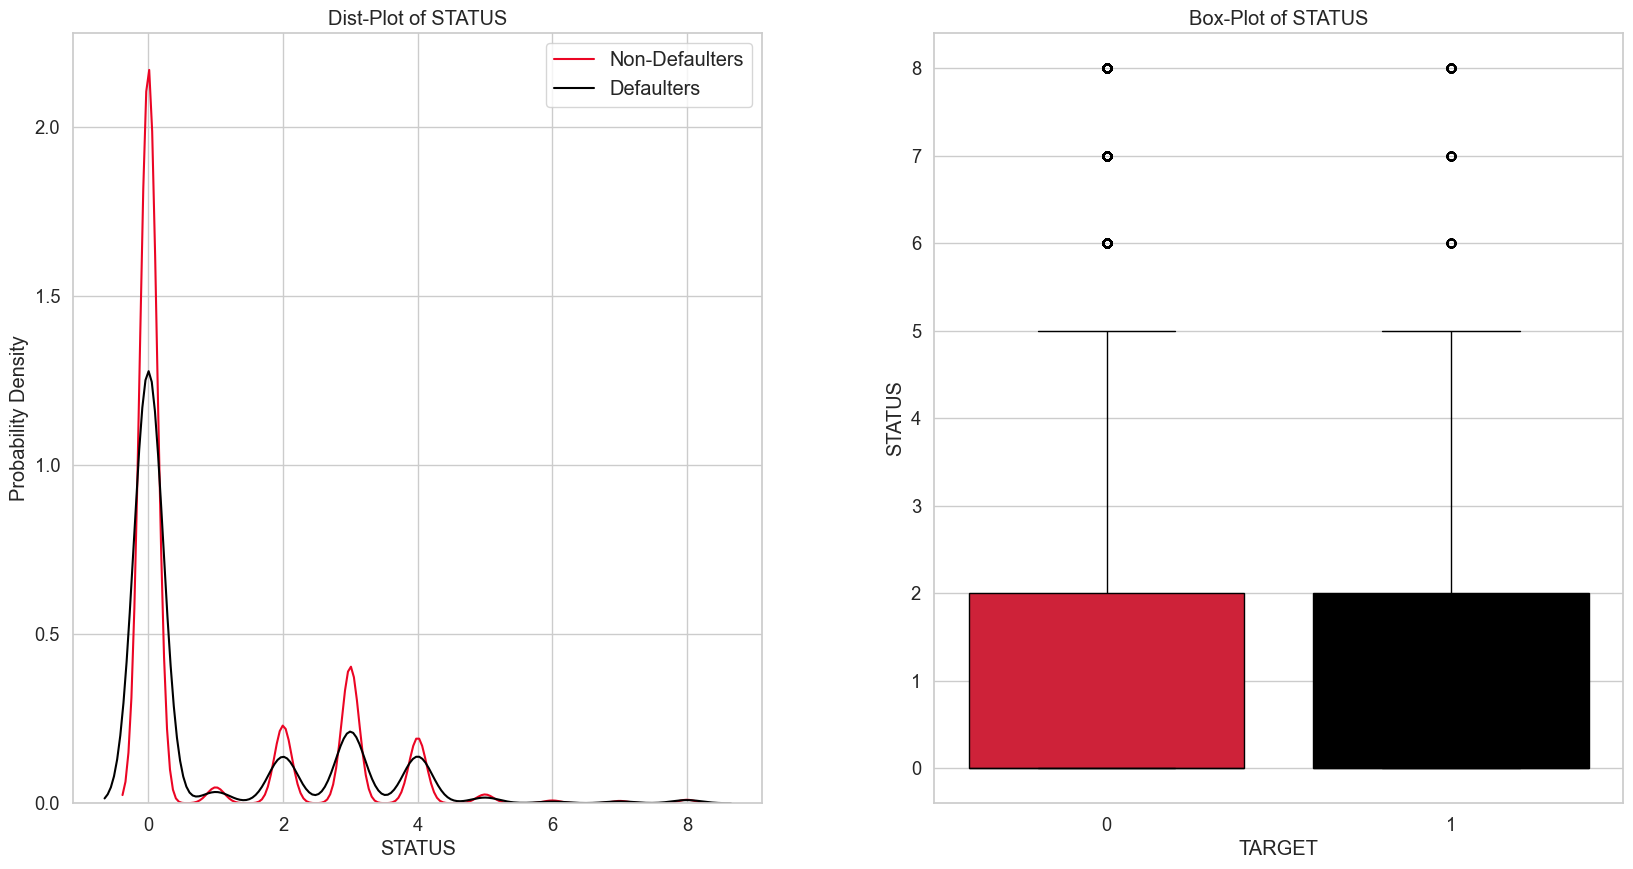

In [20]:
# STATUS analysis
plot_continuous_variables(grp,'STATUS', plots = ['distplot','box'],figsize=(20,10))

It can be said that the number of STATUS does not affect whether customers have difficulty repaying debt or not because the distribution is very similar.